In [133]:
import cv2
import numpy as np
from numpy import unravel_index
from matplotlib import pyplot as plt
import math
import random
from scipy import signal

sample1 = cv2.imread("hw3_sample_images/sample1.png", cv2.IMREAD_GRAYSCALE)
sample2 = cv2.imread("hw3_sample_images/sample2.png", cv2.IMREAD_GRAYSCALE)
sample3 = cv2.imread("hw3_sample_images/sample3.png", cv2.IMREAD_GRAYSCALE)

Design a morphological processing to extract the objects’ boundaries in sample1.png and
output the result as result1.png.

In [134]:
def change_to_binary(img):
    res=np.zeros(img.shape)
    res[img>128]=1
    return res

sample1_binary= change_to_binary(sample1)

True

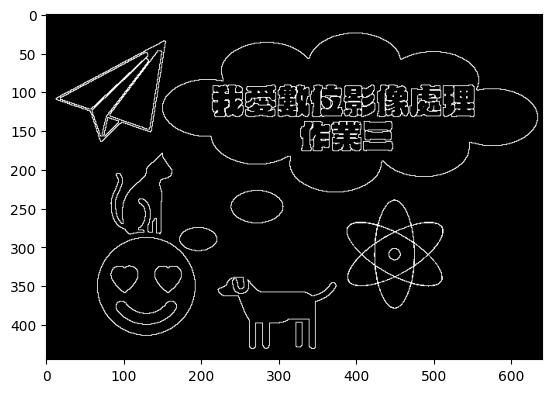

In [135]:
def erosion(src_img,kernel,kernel_size):
    height,width = src_img.shape
    pad_size = kernel_size//2
    B=kernel.sum()
    res_img = np.zeros((height,width))
    for i in range(pad_size,height-pad_size):
        for j in range(pad_size,width-pad_size):
            pattern = src_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
            if (pattern*kernel).sum() == B:
                res_img[i][j]=1
    return res_img

def extract_boundaries(img,kernel,kernel_size):
    height,width=img.shape
    res=erosion(img,kernel,kernel_size)
    res= img-res
    return res

kernel=np.array([[1,1,1],[1,1,1],[1,1,1]])
kernel_size=3
result1 = extract_boundaries(sample1_binary,kernel,kernel_size)
plt.imshow(result1,cmap='gray')
cv2.imwrite("result1.png",result1*255)

In [136]:
# kernel=np.ones((3,3))
# kernel_size=3
# result1 = extract_boundaries(sample1_binary,kernel,kernel_size)
# plt.imshow(result1,cmap='gray')

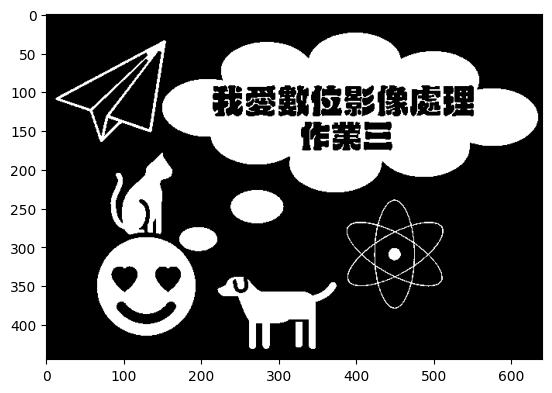

In [137]:
def original_plt(img):
    plt.imshow(img,cmap='gray')

original_plt(sample1)

Perform hole filling on sample1.png and output the result as result2.png.

In [138]:
holes=[[350,100],[350,160],[390,110],[325,400],[275,410],[360,450]]

def convolution(img,kernel,kernel_size):
    height,width = img.shape
    pad_size = kernel_size//2
    pad_img = cv2.copyMakeBorder(img,pad_size,pad_size,pad_size,pad_size,cv2.BORDER_REFLECT)
    G= np.zeros(pad_img.shape)
    for i in range(pad_size,pad_size+height):
        for j in range(pad_size,pad_size+width):
             window = pad_img[i-pad_size:i+pad_size+1,j-pad_size:j+pad_size+1]
             window=window[::-1,::-1]
             G[i,j]=(window*kernel).sum()
    return G[pad_size:pad_size+height,pad_size:pad_size+width]

def complement(img):
    res=np.zeros(img.shape)
    res[img==0]=1
    return res

def reflection(img):
    res = img[::-1,::-1]
    return res

def dilation(img,kernel,kernel_size):
    after_con=convolution(img,kernel,kernel_size)
    res=np.zeros(img.shape)
    res[after_con>=1]=1
    return res
def hole_filling(img,start_i,start_j):
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
    kernel_size=3
    height,width=img.shape
    G= np.zeros((height,width))
    G[start_i][start_j]=1
    img_C=complement(img)
    while True:
        new_G=dilation(G,kernel,kernel_size)
        new_G[img_C==0]=0
        if (G==new_G).all():
            break
        G = new_G
    new_G[img==1]=1
    return new_G
result2 = sample1_binary.copy()
for hole in holes:
    result = hole_filling(result2,hole[0],hole[1])
plt.imshow(result2,cmap='gray')
cv2.imwrite("result2.png",result2*255)

KeyboardInterrupt: 

Design an algorithm to count the number of objects in sample1.png. Describe the steps
in detail and specify the corresponding parameters.

label:1


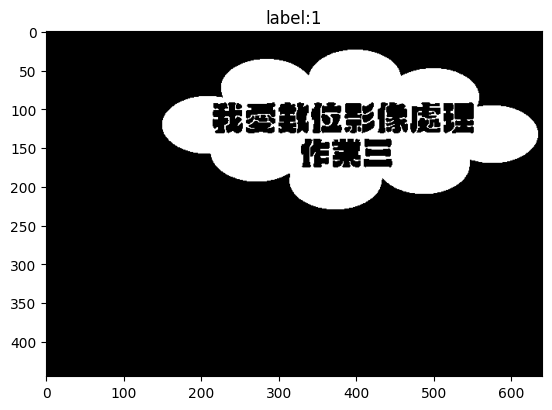

label:2


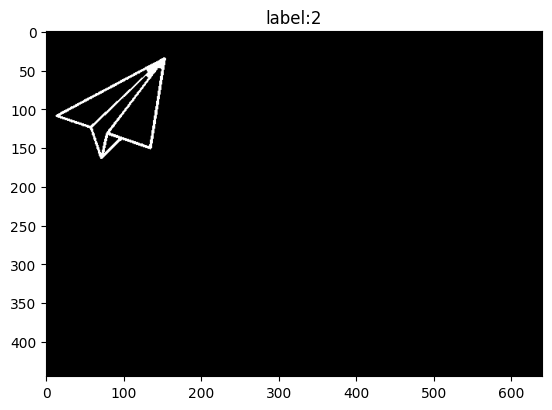

label:3


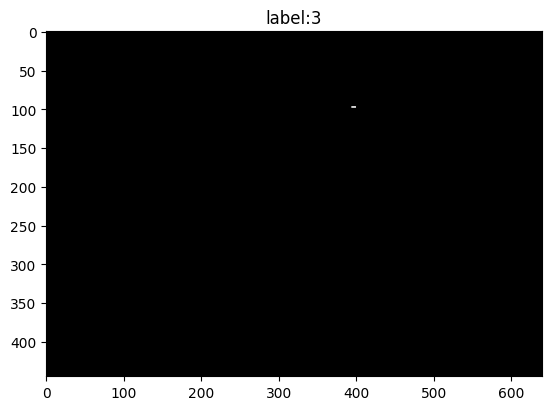

label:4


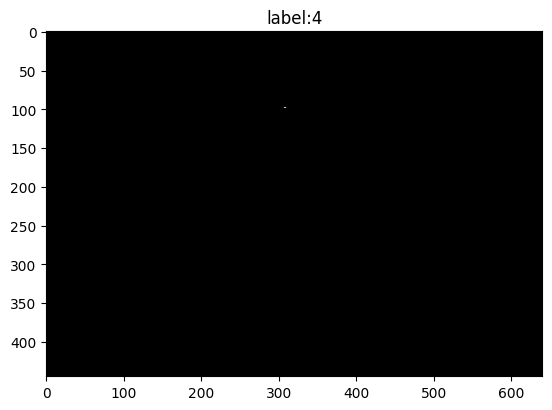

label:5


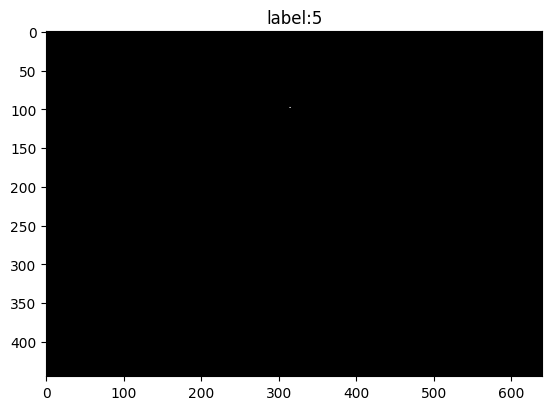

label:6


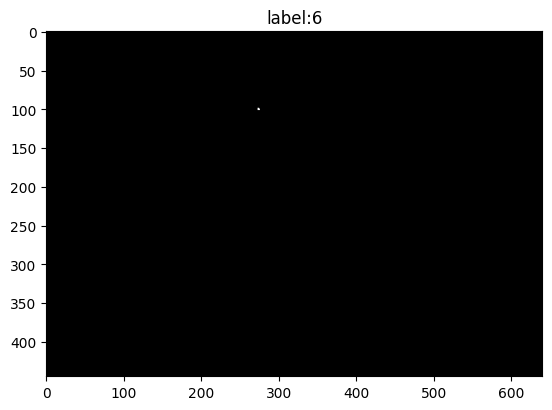

label:7


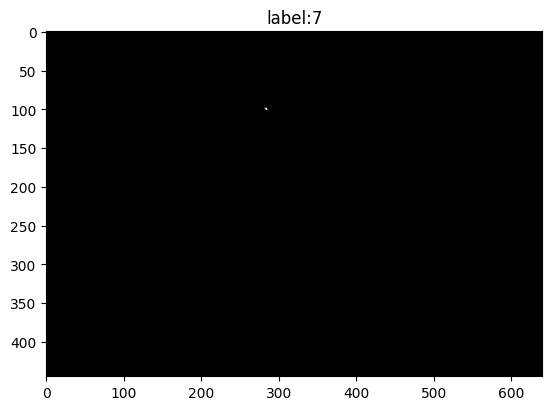

label:8


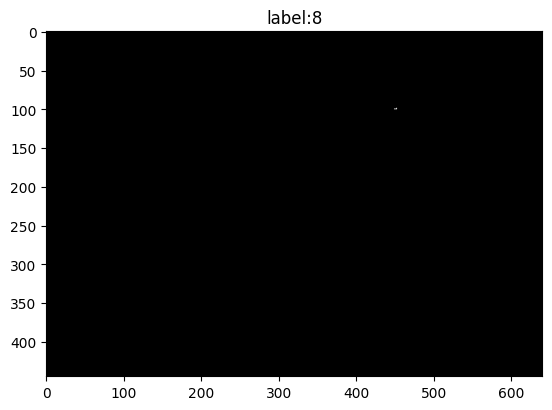

label:9


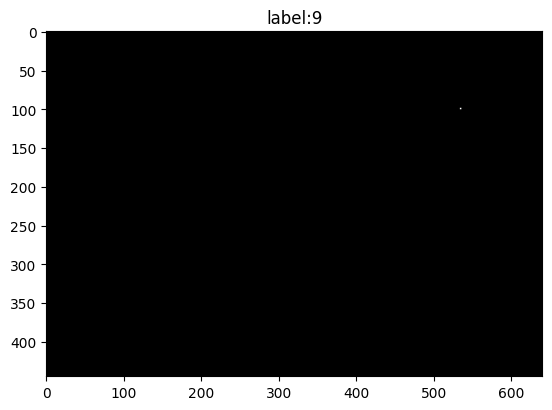

label:10


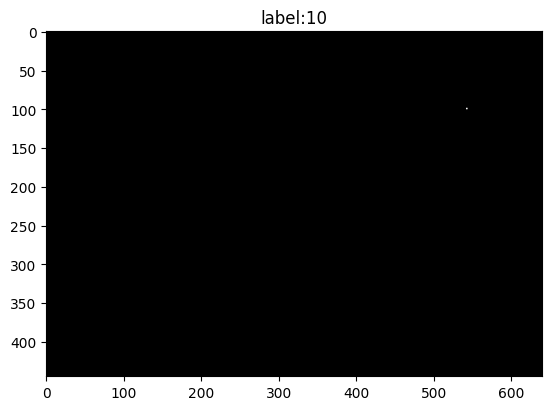

label:11


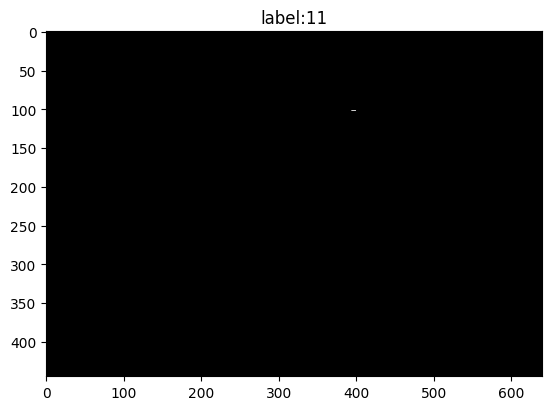

label:12


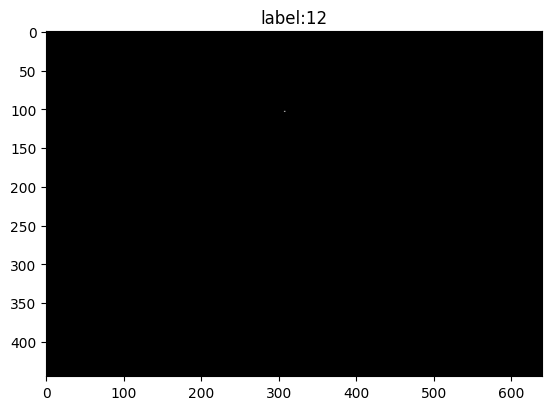

label:13


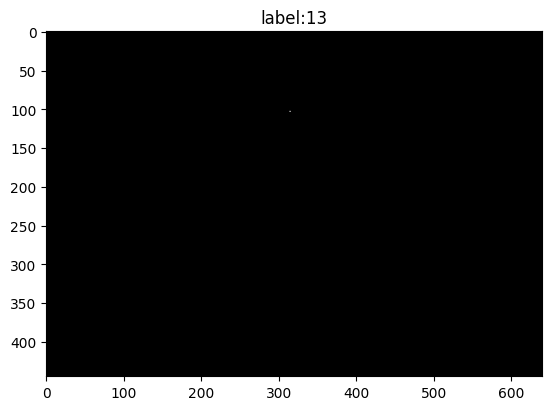

label:14


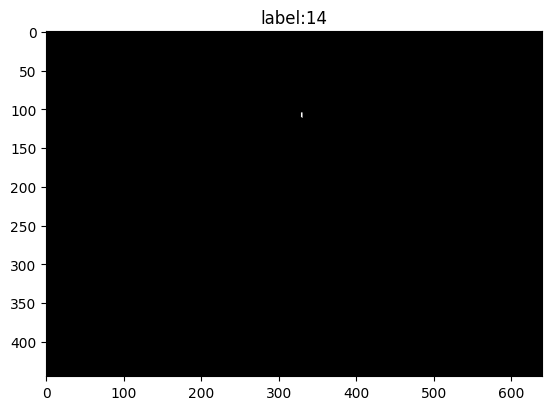

label:15


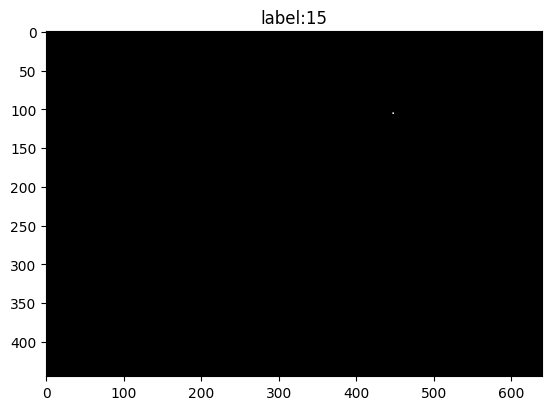

label:16


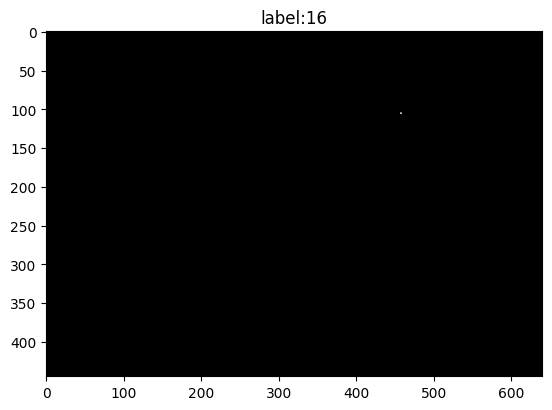

label:17


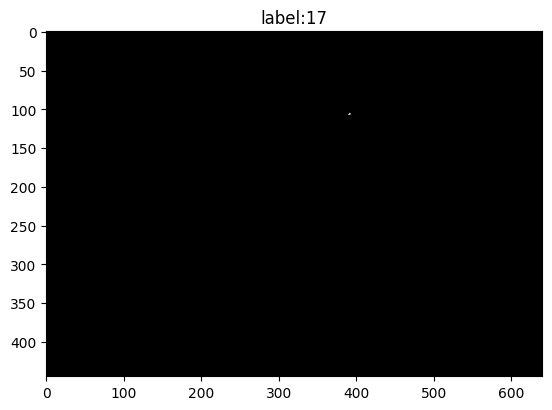

label:18


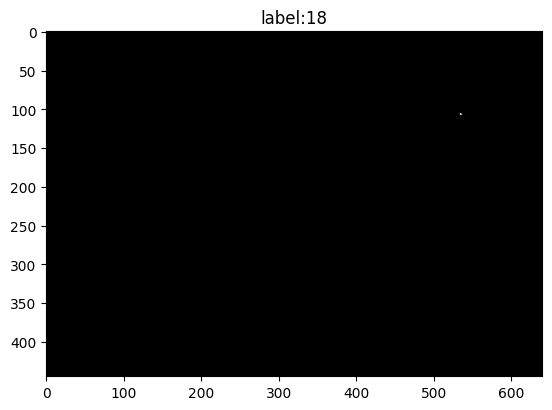

label:19


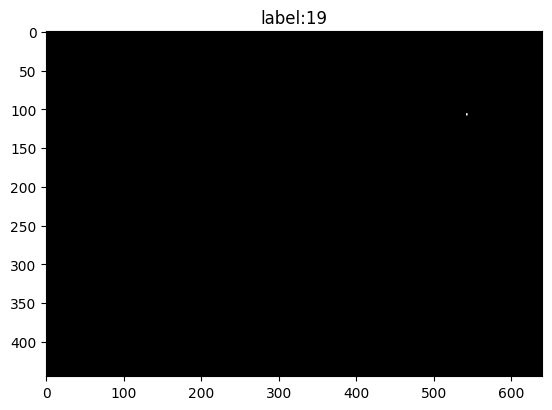

label:20


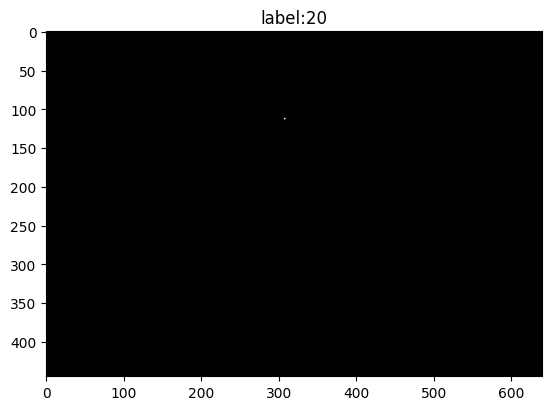

label:21


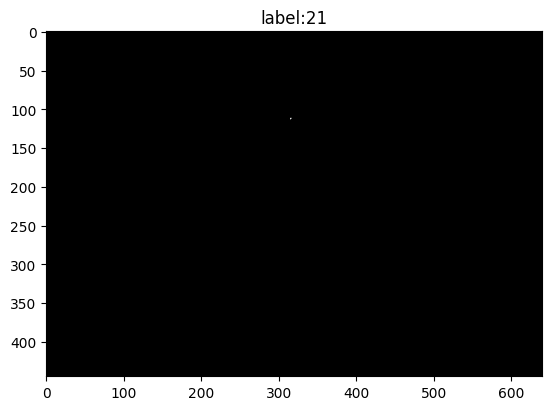

label:22


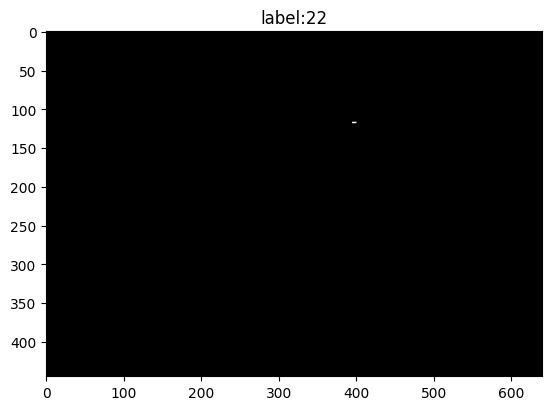

label:23


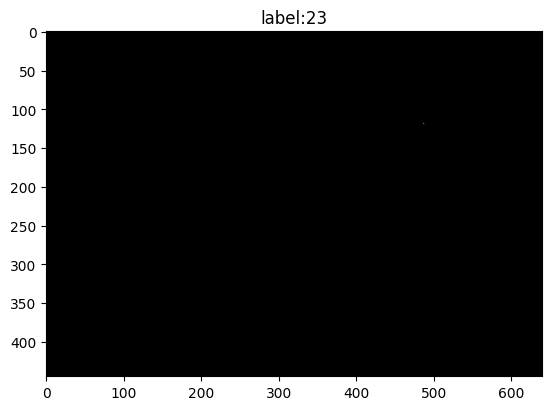

label:24


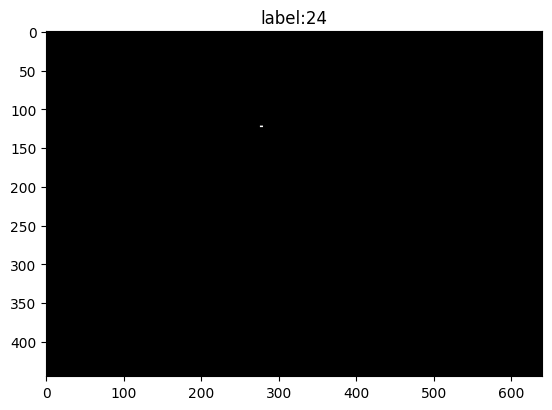

label:25


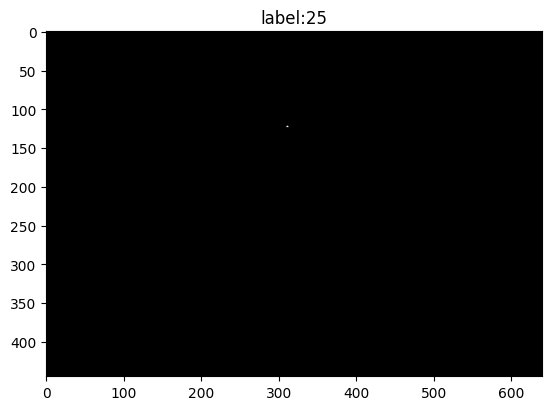

label:26


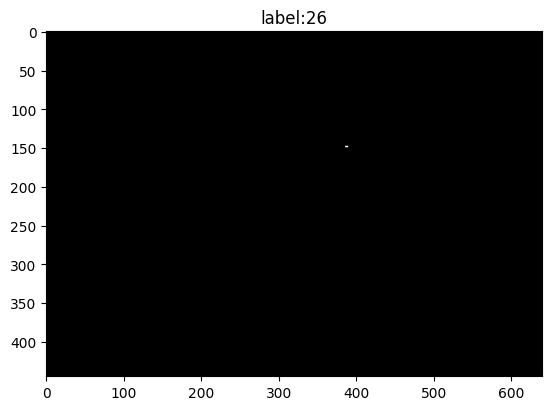

label:27


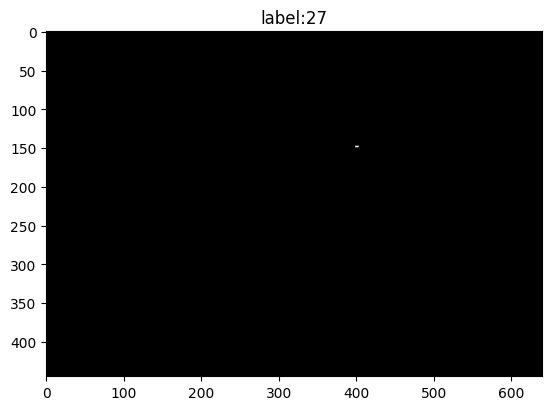

label:28


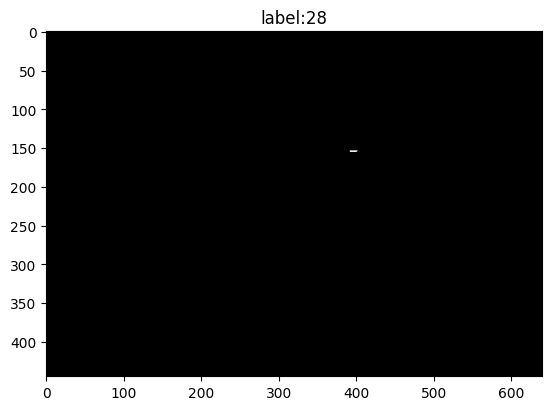

label:29


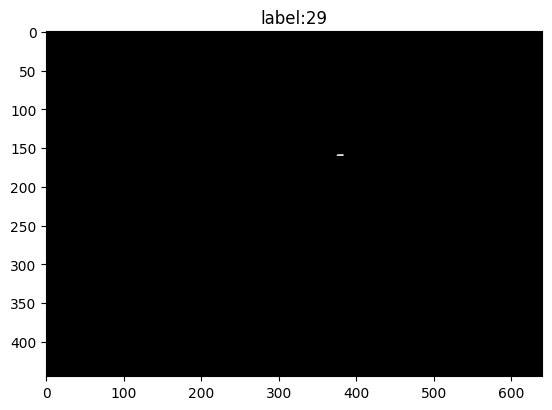

label:30


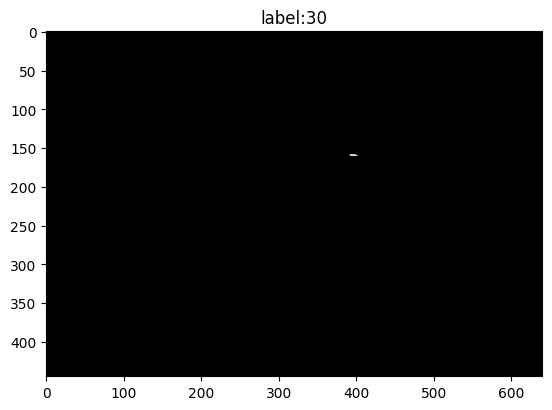

label:31


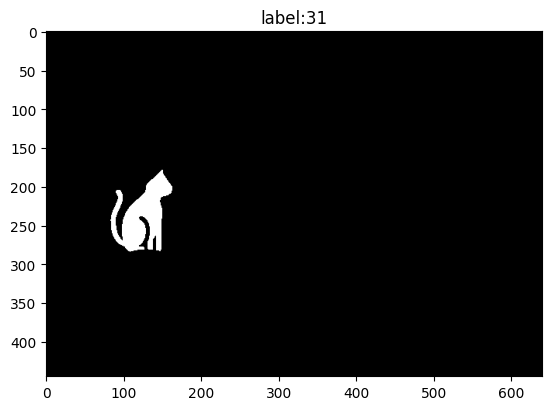

label:32


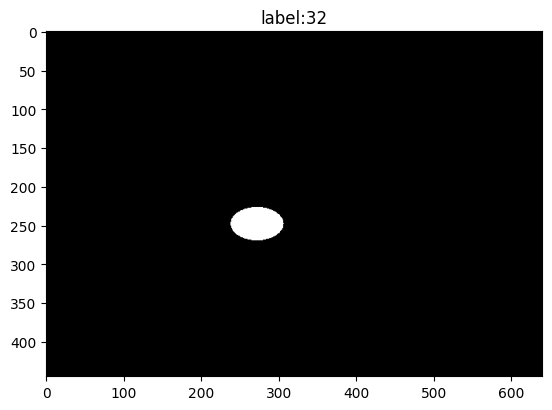

label:33


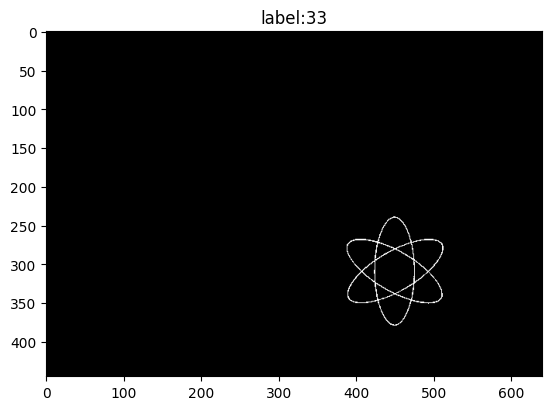

label:34


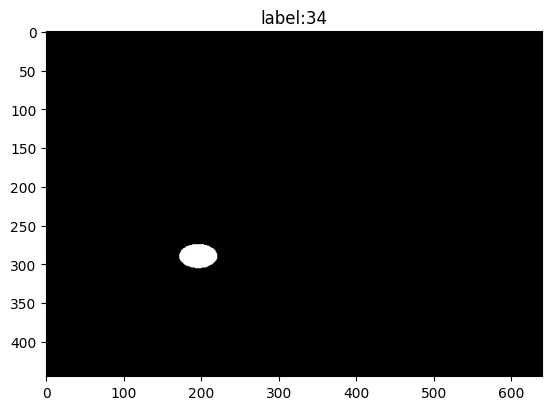

label:35


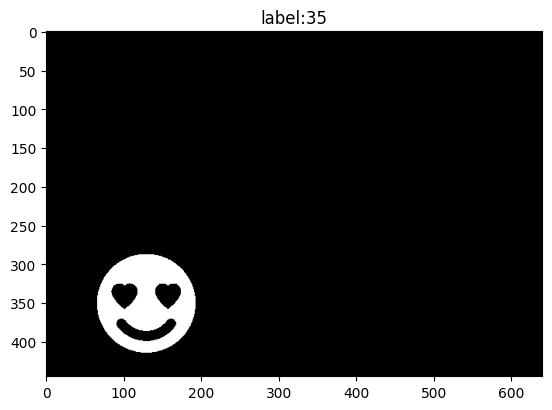

label:36


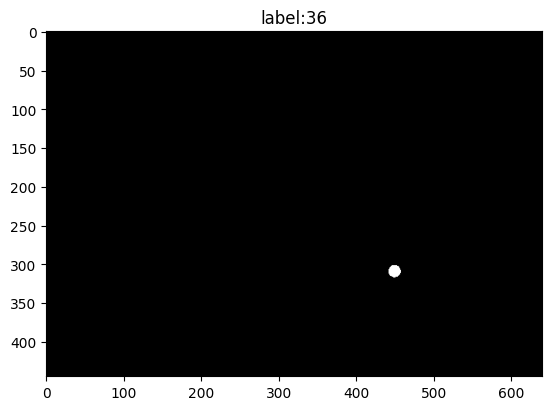

label:37


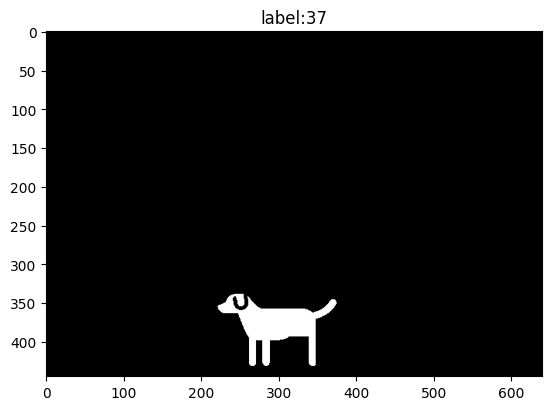

label:38


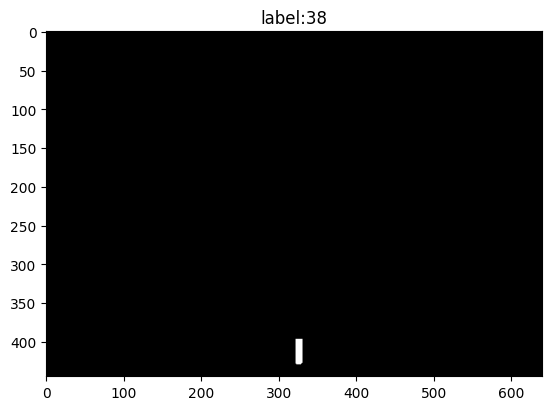

38


In [ ]:
def find_connected_component(img):
    height,width = img.shape
    kernel=np.ones((3,3))
    kernel_size=3
    F = img.copy()
    L=np.zeros((height,width))
    label=0
    for i in range(0,height):
        for j in range(0,width):
            if F[i][j]==1:
                label+=1
                G= np.zeros((height,width))
                G[i][j]=1
                while True:
                    new_G=dilation(G,kernel,kernel_size)
                    new_G[F==0]=0
                    if (G==new_G).all():
                        break
                    G = new_G
                L[new_G==1]=label
                print(f"label:{label}")
                plt.imshow(new_G, cmap='gray')
                plt.title(f"label:{label}")
                plt.show()
                F=F-new_G
    return L,label

L,number_of_objects=find_connected_component(sample1_binary)
print(number_of_objects)

Apply open operator and close operator to sample1.png and output the results as re-
sult3.png and result4.png, respectively. How will it affect the result images if you change the
shape of the structuring element?

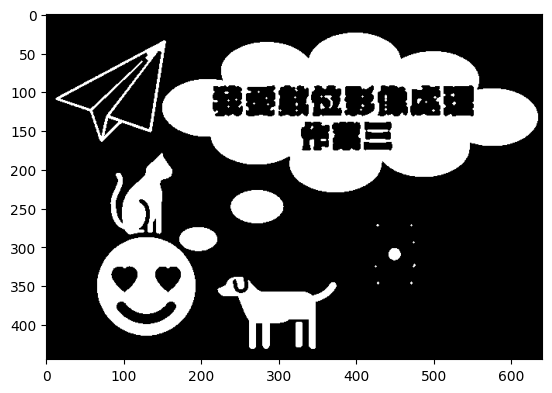

In [ ]:
def open_operator(img,H,H_size):
    H_R=reflection(H)
    after_erosion=erosion(img,H_R,H_size)
    res = dilation(after_erosion,H,H_size)
    return res

result3 = open_operator(sample1_binary,np.array([[0,1,0],[1,1,1],[0,1,0]]),3)
plt.imshow(result3,cmap='gray')

True

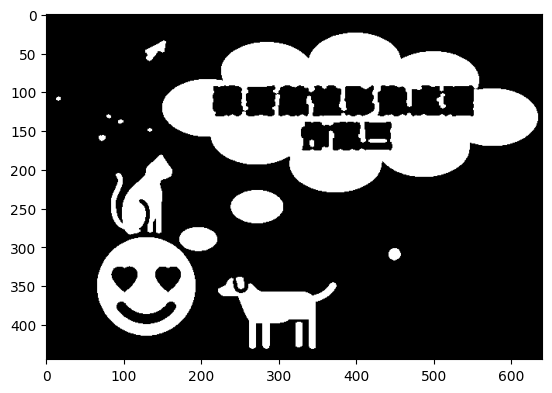

In [ ]:
# Elliptical Kernel
result3 = open_operator(sample1_binary,np.array([[0, 0, 1, 0, 0],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1], [0, 0, 1, 0, 0]]),5)
plt.imshow(result3,cmap='gray')
cv2.imwrite("result3.png",result3*255)

True

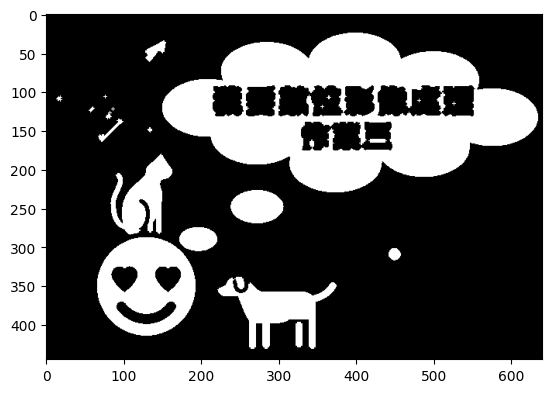

In [ ]:
# Cross-shaped Kernel
result3_1 = open_operator(sample1_binary,np.array([[0, 0, 1, 0, 0],[0, 0, 1, 0, 0],[1, 1, 1, 1, 1],[0, 0, 1, 0, 0],[0, 0, 1, 0, 0]]),5)
plt.imshow(result3_1,cmap='gray')
cv2.imwrite("result3_1.png",result3*255)

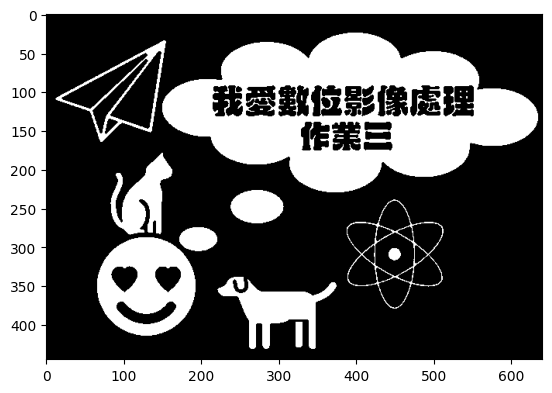

In [ ]:
def close_operator(img,H,H_size):
    H_R=reflection(H)
    after_dilation=dilation(img,H,H_size)
    res = erosion(after_dilation,H_R,H_size)
    return res

result4 = close_operator(sample1_binary,np.array([[0,1,0],[1,1,1,],[0,1,0]]),3)
plt.imshow(result4,cmap='gray')

True

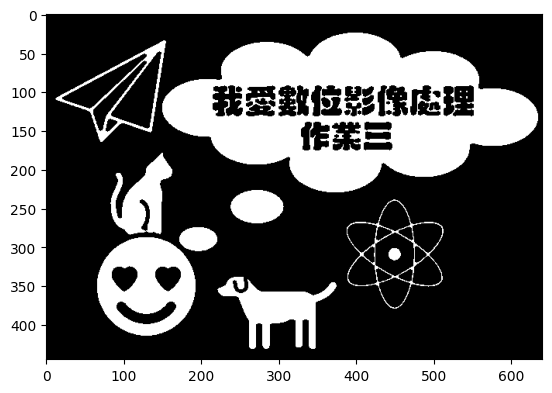

In [ ]:
# Elliptical Kernel
result4 = close_operator(sample1_binary,np.array([[0, 0, 1, 0, 0],
                                                 [1, 1, 1, 1, 1],
                                                 [1, 1, 1, 1, 1],
                                                 [1, 1, 1, 1, 1],
                                                 [0, 0, 1, 0, 0]]),5)
plt.imshow(result4,cmap='gray')
cv2.imwrite("result4.png",result4*255)

True

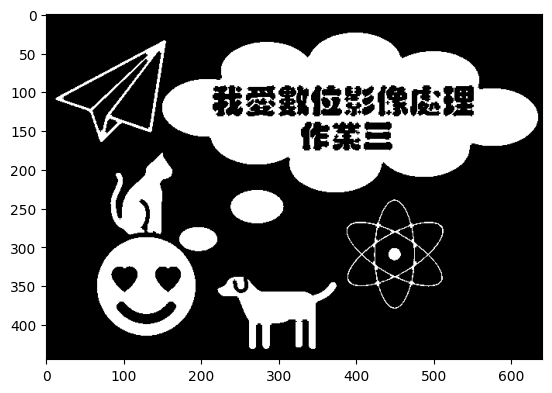

In [ ]:
# Cross-shaped Kernel
result4_1 = close_operator(sample1_binary,np.array([[0, 0, 1, 0, 0],[0, 0, 1, 0, 0],[1, 1, 1, 1, 1],[0, 0, 1, 0, 0],[0, 0, 1, 0, 0]]),5)
plt.imshow(result4_1,cmap='gray')
cv2.imwrite("result4_1.png",result4_1*255)

Perform Law’s method on sample2.png to obtain the feature vectors. Please describe
how you obtain the feature vectors and provide the reason why you choose it in this way.

In [ ]:
# Laws' method
H1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 36
H2 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) / 12
H3 = np.array([[-1, 2, -1], [-2, 4, -2], [-1, 2, -1]]) / 12
H4 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 12
H5 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]]) / 4
H6 = np.array([[-1, 2,-1], [0, 0, 0], [1, -2, 1]]) / 4
H7 = np.array([[-1, -2, -1], [2, 4, 2], [-1, -2, -1]]) / 12
H8 = np.array([[-1, 0, 1], [2, 0, -2], [-1, 0, 1]]) / 4
H9 = np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]) / 4
# Step1:Convolution
M1 = convolution(sample2,H1,3)
M2 = convolution(sample2,H2,3)
M3 = convolution(sample2,H3,3)
M4 = convolution(sample2,H4,3)
M5 = convolution(sample2,H5,3)
M6 = convolution(sample2,H6,3)
M7 = convolution(sample2,H7,3)
M8 = convolution(sample2,H8,3)
M9 = convolution(sample2,H9,3)
#Step2:Energy computation
window_size=15
window = np.ones((window_size,window_size))
T1 = convolution(M1 * M1, window, window_size)
T2 = convolution(M2 * M2, window, window_size)
T3 = convolution(M3 * M3, window, window_size)
T4 = convolution(M4 * M4, window, window_size)
T5 = convolution(M5 * M5, window, window_size)
T6 = convolution(M6 * M6, window, window_size)
T7 = convolution(M7 * M7, window, window_size)
T8 = convolution(M8 * M8, window, window_size)
T9 = convolution(M9 * M9, window, window_size)

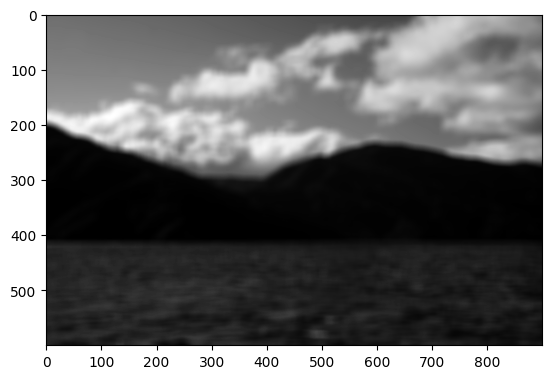

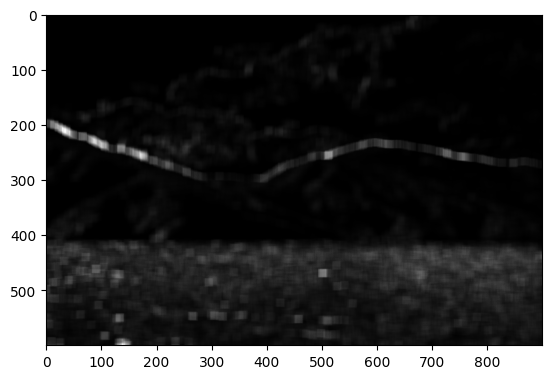

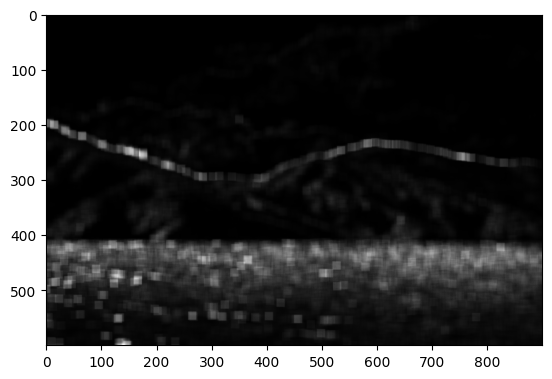

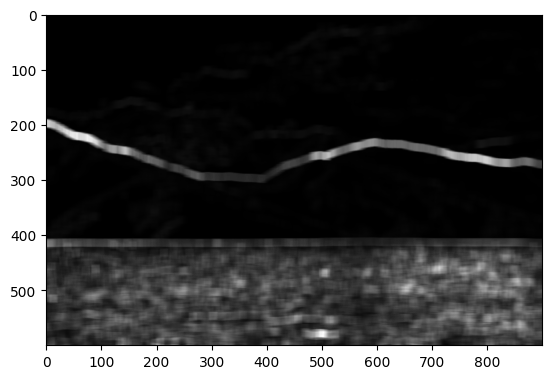

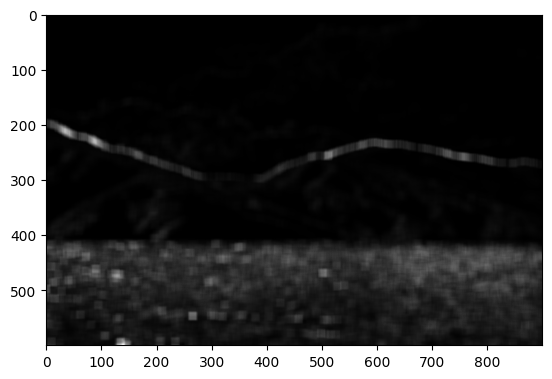

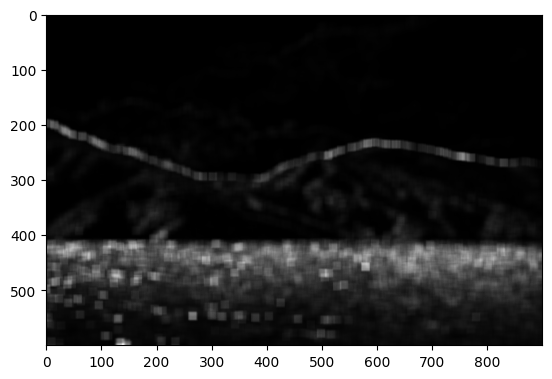

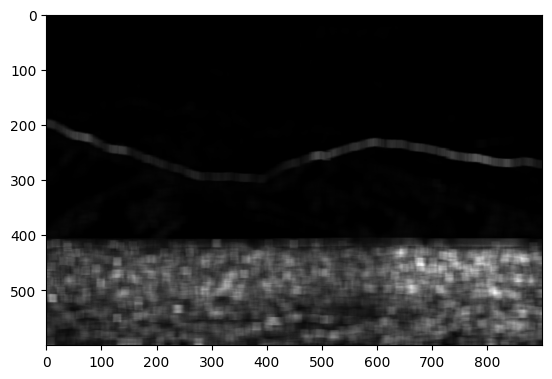

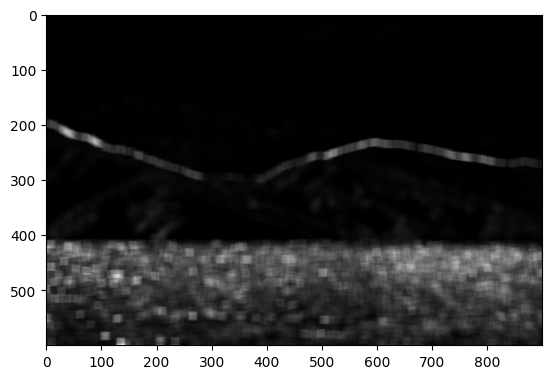

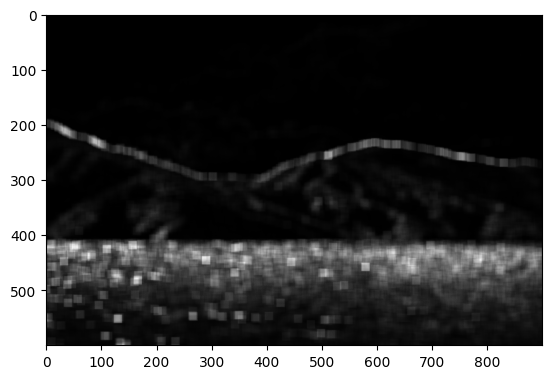

In [ ]:
local_feature = np.stack([T1, T2, T3, T4, T5, T6, T7, T8, T9])
# index=0
for T in local_feature:
    T = T/T.max()*255
    # index +=1
    plt.imshow(T, cmap='gray')
    plt.show()
    # cv2.imwrite(f"T{index}.png",T)

Use k-means algorithm to classify each pixel with the feature vectors you obtained from
(a). Label the pixels of the same texture with the same color and output it as result5.png. Please
describe how you use the features in k-means algorithm and all the chosen parameters in detail.

In [ ]:
laws_method = np.moveaxis(local_feature, 0, -1) #(600,900,9)
# print(laws_method.shape)
def K_means(feature,K,iteration):
    # height,width,dimension=feature.shape
    height=feature.shape[0]
    width=feature.shape[1]
    # feature.reshape(-1,9)
    C=np.ones((height,width))
    C*=-1
    K=4
    # initialization
    # i_list=random.sample(range(height),K)
    # j_list=random.sample(range(width),K)
    # centroids=np.array([feature[i_list[0]][j_list[0]]])
    # for k in range(1,K):
    #     centroids=np.append(centroids,[feature[i_list[k]][j_list[k]]],axis=0)
    centroids=np.array([feature[100][100],feature[50][680],feature[350][500],feature[500][400]])
    for _ in range(iteration):
        # step1: form k clusters using the NN rule
        group=[[]for i in range(K)]
        for i in range(0,height):
            for j in range(0,width):
                k=-1
                min_diff=float('inf')
                for centroid in centroids:
                    k+=1
                    diff=np.dot(feature[i][j]-centroid,feature[i][j]-centroid)
                    if diff <min_diff:
                        min_diff=diff
                        C[i][j] = k
                group[int(C[i][j])].append(feature[i][j])
        # step2: re-compute the centroid of each cluster
        for k in range(K):
            group_k=np.array(group[k])
            centroids[k]=group_k.mean(axis=0)
    return C
K=4
iteration=10
C=K_means(laws_method,K,iteration)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

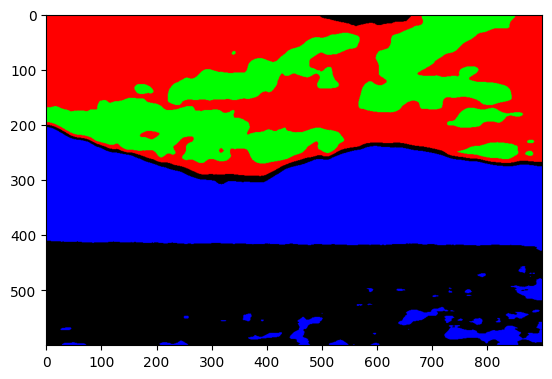

In [ ]:
def plot_random_color(C):
    height,width=C.shape
    res = np.zeros((height, width, 3))
    for i in range(height):
        for j in range(width):
            if (C[i][j] == 0):
                res[i][j][0] = 255
            elif (C[i][j] == 1):
                res[i][j][1] = 255
            elif (C[i][j] == 2):
                res[i][j][2] = 255
    plt.imshow(res)
    return res

result5=plot_random_color(C)
cv2.imwrite("result5.png",result5)

In [ ]:
#improve
# local_feature_improve = np.stack([100*T1, T2, T3, 50*T4, T5, T6, 50*T7, T8, T9])
# local_feature_improve = np.moveaxis(local_feature_improve, 0, -1)
# new_improve=K_means(local_feature_improve,4,10)

# new_improve=plot_random_color(new_improve)
# cv2.imwrite("new_improve.png",new_improve)

# # new_feature_select=np.stack([T1,0*T3,T4,T5,T7,0*T8,0*T9])
# def k_means_improve(feature_array):
#     dim,height,width=feature_array.shape
#     C_stack=np.zeros((dim,height,width))
#     res=np.zeros((height,width))
#     res*=-1
#     for i in range(0,dim):
#         C=K_means(feature_array[i],4,10)
#         ###
#         C_stack[i]=C
#         print(C_stack)
#     return C_stack
    

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

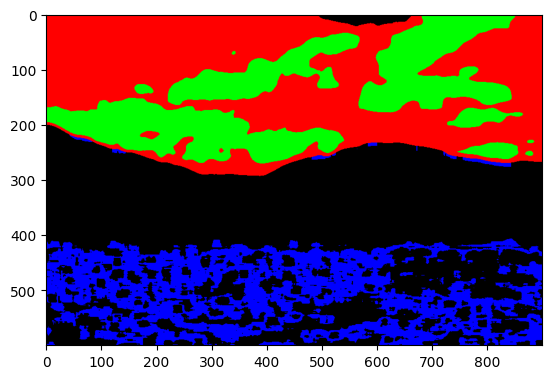

In [ ]:
# # reference:https://blog.csdn.net/huangguohui_123/article/details/103592169   
# C_stack=k_means_improve(new_feature_select)
# C_candidate = np.moveaxis(C_stack[1:], 0, -1)
# height,width=local_feature.shape[1],local_feature.shape[2]
# result_improve=np.zeros((height,width))
# result_improve*=-1
# for i in range(0,height):
#     for j in range(0,width):
#         unique,count=np.unique(C_candidate[i][j],return_counts=True)
#         data_count=dict(zip(unique,count))
#         c=max(data_count,key=data_count.get)
#         if c ==2:
#             result_improve[i][j]=2
#         else:
#             result_improve[i][j]=3
# result_improve[C_stack[4]==2]=2
# # result_improve[C_stack[4]==3]=3
# result_improve[C_stack[0]==0]=0
# result_improve[C_stack[0]==1]=1
# result_improve=plot_random_color(result_improve)
# cv2.imwrite("result_improve.png",result_improve)
# # print(local_feature.shape)

Based on result5.png, design a method to improve the classification result and output the
updated result as result6.png. Describe the modifications in detail and explain the reason why.

In [ ]:
# try later
# Laws' method
# Step1:Convolution has already been completed."
#Step2:Energy computation
window_size=31
window = np.ones((window_size,window_size))
T1 = convolution(M1 * M1, window, window_size)
T2 = convolution(M2 * M2, window, window_size)
T3 = convolution(M3 * M3, window, window_size)
T4 = convolution(M4 * M4, window, window_size)
T5 = convolution(M5 * M5, window, window_size)
T6 = convolution(M6 * M6, window, window_size)
T7 = convolution(M7 * M7, window, window_size)
T8 = convolution(M8 * M8, window, window_size)
T9 = convolution(M9 * M9, window, window_size)

In [ ]:
local_feature_improve=np.stack([T1, T2, T3, T4, T5, T6, T7, T8, T9])
laws_method_improve = np.moveaxis(local_feature_improve, 0, -1)

C_improve=K_means(laws_method_improve,4,10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

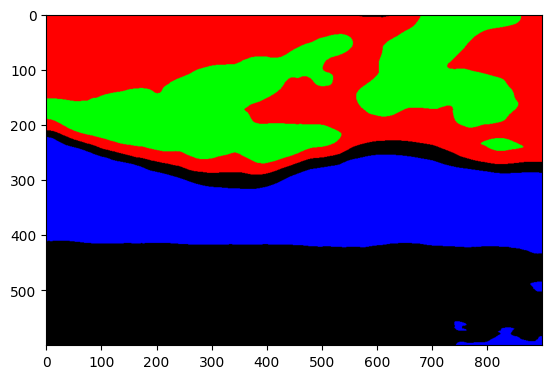

In [ ]:
resul6=plot_random_color(C_improve)
cv2.imwrite("resul6.png",resul6)

In [ ]:
# try later
# Laws' method
# Step1:Convolution has already been completed."
#Step2:Energy computation
window_size=51
window = np.ones((window_size,window_size))
T1 = convolution(M1 * M1, window, window_size)
T2 = convolution(M2 * M2, window, window_size)
T3 = convolution(M3 * M3, window, window_size)
T4 = convolution(M4 * M4, window, window_size)
T5 = convolution(M5 * M5, window, window_size)
T6 = convolution(M6 * M6, window, window_size)
T7 = convolution(M7 * M7, window, window_size)
T8 = convolution(M8 * M8, window, window_size)
T9 = convolution(M9 * M9, window, window_size)

In [ ]:
local_feature_improve=np.stack([T1, T2, T3, T4, T5, T6, T7, T8, T9])
laws_method_improve = np.moveaxis(local_feature_improve, 0, -1)

C_improve=K_means(laws_method_improve,4,10)

3.0


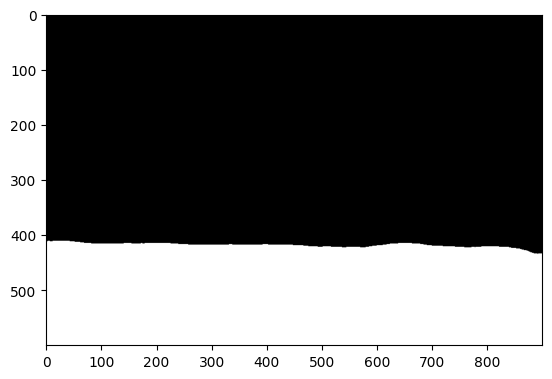

In [ ]:
sea_label=C_improve[500,300]
print(sea_label)
mask = np.where(C_improve == sea_label, 1, 0)
mask[450:,700:]=1
mask[0:350,:]=0
plt.imshow(mask, cmap='gray')

In [ ]:
# reference:https://github.com/bglogowski/ImageQuilting
def quilt_random(sample, out_size, patch_size):
    """
    Randomly samples square patches of size patchsize from sample in order to create an output image of size outsize.

    :param sample: numpy.ndarray   The image you read from sample directory
    :param out_size: int            The width of the square output image
    :param patch_size: int          The width of the square sample patch
    :return: numpy.ndarray
    """
    
    # Find the dimensions of the sample image
    sample_rows, sample_cols = sample.shape
    
    # Find a random starting point to create patch
    random_row = int(round(random.random() * (sample_rows - patch_size)))
    random_col = int(round(random.random() * (sample_cols - patch_size)))
    
    # Create patch
    patch = np.zeros((patch_size,patch_size), np.uint8)
    for row in range(patch_size):
        for col in range(patch_size):
            patch[row][col] = sample[random_row + row][random_col + col]

    # Number of patches that fit across output image
    patch_copies = int(out_size/patch_size)

    
    # Create output image
    out = np.zeros((out_size,out_size), np.uint8)
    for row in range(0, patch_copies*patch_size, patch_size):
            for col in range(0, patch_copies*patch_size, patch_size):
                
                random_row = int(round(random.random() * (sample_rows - patch_size)))
                random_col = int(round(random.random() * (sample_cols - patch_size)))
                
                patch = np.zeros((patch_size,patch_size), np.uint8)
                for i in range(patch_size):
                    for j in range(patch_size):
                        patch[i][j] = sample[random_row + i][random_col + j]
                        
                for i in range(patch_size):
                    for j in range(patch_size):
                        out[row+i][col+j] = patch[i][j]

    return out

sample3_padding = quilt_random(sample3, 900, 10)
sample3_padding = sample3_padding[:600,:900]

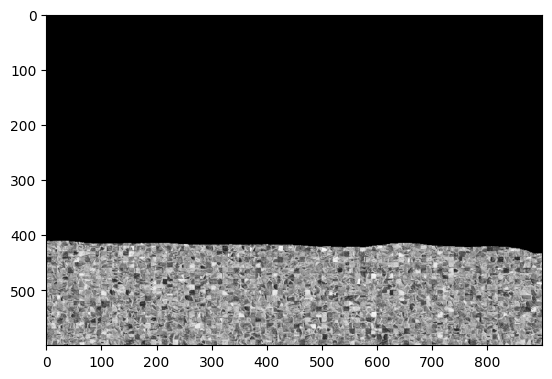

In [ ]:
sample3_padding = sample3_padding*mask
plt.imshow(sample3_padding, cmap='gray')

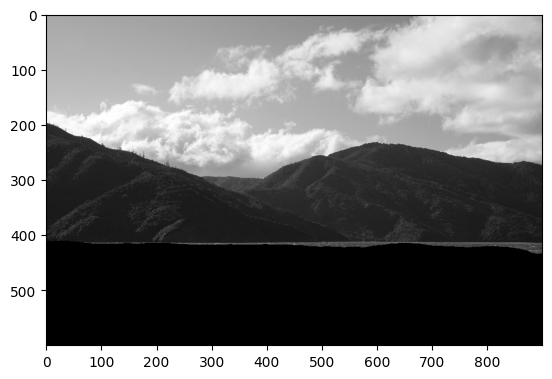

In [ ]:
result7 = sample2.copy()
result7[sample3_padding != 0] = 0
plt.imshow(result7, cmap='gray')

True

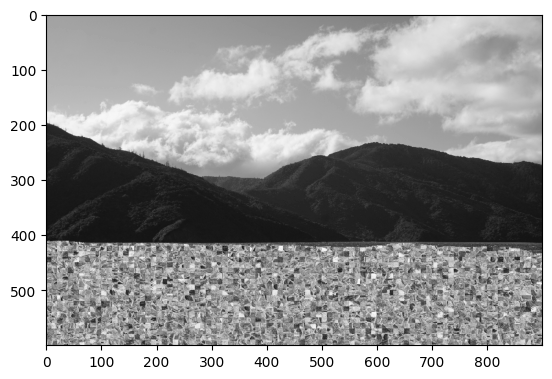

In [ ]:
result7 = result7 + sample3_padding
plt.imshow(result7, cmap='gray')
cv2.imwrite("result7.png",result7)